<a href="https://colab.research.google.com/github/Yashasvi-30/Predictive-Analysis/blob/main/Clusatering-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23904\2354358870.py:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Amazon Sale Report.csv')


       index  Order ID  Date  Status  Fulfilment  Sales Channel   \
49051      0     16653    31       3           0               0   
49077      1      3879    31       3           0               0   
49081      2      3747    31       3           0               0   
49082      3     15724    31       3           0               0   
49083      4      5292    31       3           0               0   

       ship-service-level  Style   SKU  Category  ...  currency  Amount  \
49051                   0    283   972         7  ...         0     413   
49077                   0    535  1923         5  ...         0      70   
49081                   0    649  2382         6  ...         0     349   
49082                   0    147   457         6  ...         0       0   
49083                   0    150   475         6  ...         0     297   

       ship-city  ship-state  ship-postal-code  ship-country  promotion-ids  \
49051       2245           1              2295             0 

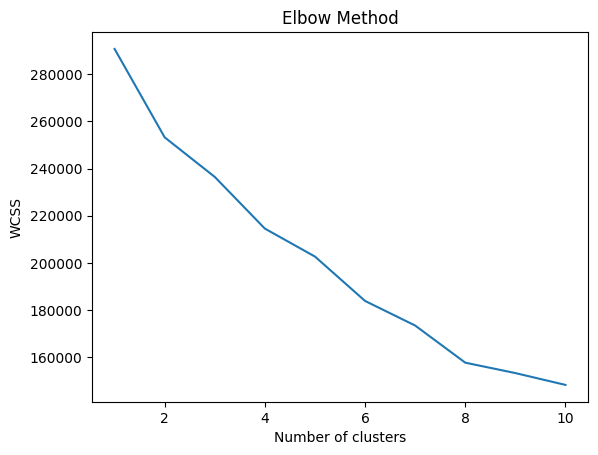

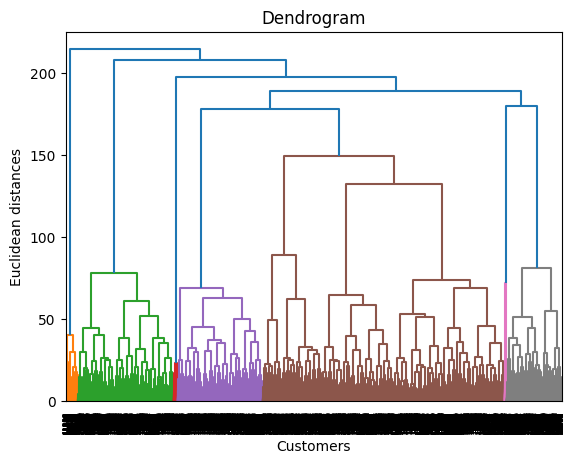

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('Amazon Sale Report.csv')

# Drop any rows with missing values (if applicable)
data = data.dropna()

# Encoding categorical fields using LabelEncoder
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the first few rows of the encoded dataset
print(data.head())
# Select features for clustering (excluding 'index' and 'Order ID' which are unique)
features = data.drop(columns=['index', 'Order ID'])
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scale the features (optional, depending on clustering algorithm)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-means with the optimal number of clusters
optimal_clusters = 3  # Set this based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(features_scaled)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(features_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Apply hierarchical clustering
hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
data['HC_Cluster'] = hc.fit_predict(features_scaled)

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 2: Load the dataset (Amazon Sale report.csv)

data = pd.read_csv('Amazon Sale Report.csv')

# Step 3: Explore the dataset (adjust field names based on your actual columns)
print(data.head())  # View the first few rows of data
print(data.info())  # Check for missing values and data types
print(data.describe())  # Summary statistics

# Step 4: Handle missing values (if any)
# Example: Imputing missing values with the mean for numerical columns
data.fillna(data.mean(), inplace=True)

# Step 5: Feature selection (use relevant features for clustering)
# Assuming your dataset contains Age, Annual Income, Spending Score, and possibly others
X = data[['Age', 'Annual Income', 'Spending Score']]

# Step 6: Normalize/Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: K-Means Clustering

# Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with the chosen number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Step 8: Hierarchical Clustering

# Dendrogram to find optimal clusters for hierarchical clustering
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
data['Cluster_HC'] = hc.fit_predict(X_scaled)

# Step 9: Profiling the customer segments
# Group data by KMeans clusters and get the mean of each group
cluster_profiles = data.groupby('Cluster_KMeans').mean()
print(cluster_profiles)

# Visualize the clusters (optional, using Seaborn)
sns.pairplot(data, hue='Cluster_KMeans', vars=['Age', 'Annual Income', 'Spending Score'])
plt.show()

# Step 10: Predictive Modeling for each segment
# Let's assume you want to predict customer churn (or another target variable in your dataset)
# For this example, we'll use 'Spending Score' as a proxy for prediction
target = 'Spending Score'  # Replace with your actual target variable if different
X = data[['Age', 'Annual Income', 'Cluster_KMeans']]  # Features
y = data[target]  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy (you can use other metrics as needed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Save the results back to CSV (optional)
data.to_csv('Amazon Sale Report.csv', index=False)


In [ ]:
# Profiling clusters
cluster_profile = data.groupby('Cluster').mean()
print(cluster_profile)

                index     Order ID       Date    Status  Fulfilment  \
Cluster                                                               
0         9540.231123  9173.891768  27.360150  3.375320         0.0   
1         9082.387440  8996.888164  26.064493  3.425121         0.0   
2        10050.097204  8830.252881  29.130068  3.420081         0.0   

         Sales Channel   ship-service-level       Style          SKU  \
Cluster                                                                
0                   0.0                 0.0  483.825635  1739.480655   
1                   0.0                 0.0  170.149517   538.908213   
2                   0.0                 0.0  802.684486  2975.696543   

         Category  ...  currency      Amount    ship-city  ship-state  \
Cluster            ...                                                  
0        6.760355  ...       0.0  102.741606  1352.199761   27.656042   
1        4.557246  ...       0.0  334.167633  1357.607488   27.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Choose a target variable (e.g., 'Fulfilment' or another column)
X = data.drop(columns=['Fulfilment', 'Cluster'])  # Features
y = data['Fulfilment']  # Target variable (categorical)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a classifier (e.g., RandomForest)
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy for predicting Fulfilment: {accuracy:.2f}')

Accuracy for predicting Fulfilment: 1.00
